In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd

In [3]:
from web_tracking.pre_processing.raw_data_processor import RawDataProcessor

# Load data

<div class="alert alert-warning">
<b>Warning:</b> Update the data directory path before running. 
</div>

We tested this code using the data available at https://zenodo.org/record/4383164

In [4]:
data_directory = "../../../../../../data/web_routineness_release_clean/"

Users

In [5]:
users = pd.read_csv(data_directory + '/raw/users.csv', dtype={'panelist_id': int})

Web browsing behavior

In [6]:
processed = pd.read_csv(data_directory + "/pre_processed/browsing_with_gap.csv")

List of users having enough data

In [7]:
selected_users = pd.read_csv(data_directory + '/pre_processed/selected_users.csv')

# Basic statistics

Number of individuals

In [8]:
len(users)

2148

In [9]:
len(selected_users)

1455

Number of total website visits

In [10]:
len(processed)

9151243

In [11]:
selected_users_visits = selected_users.merge(processed, left_on='user', right_on='panelist_id')
len(selected_users_visits)

8910779

Number of unique domains 

In [12]:
len(processed.top_level_domain.unique())

49918

In [13]:
processed.sample()

,id,prev_id,panelist_id,used_at,left_at,active_seconds,gap_seconds,top_level_domain,category_names_top,sub_level_domain,subdomain,category_names_sub,domain,category_names
3193009,1010795924,1010795920,754,2018-10-01 08:58:20,2018-10-01 08:58:21,1,1,kurzurlaub.de,business,NaN,NaN,NaN,kurzurlaub.de,business


In [14]:
len(selected_users_visits.top_level_domain.unique())

48721

# Comparing the top domains in our sample with Alexa

First, let's analyze our sample. How similar is the top domains in the sample with the top domains given by Alexa? 

- According to Alexa: "A website has a Reach score of 5,000, this means that 5,000 people out of a sample of 1 million"[¹](https://www.klipfolio.com/metrics/marketing/reach-per-million-users), and they calculate it by using `Count Unique(People who saw your content per Day per Million Users)`
- So, we computed number of unique visitors per domain to compare our dataset with Alexa.
- Section 4 in the article.

In [15]:
top_domains = processed.top_level_domain.value_counts(normalize=True).to_frame() \
                    .reset_index().rename(columns={'index': 'domain', 'top_level_domain': 'visits'}) \
                    .assign(rank = lambda df: range(1, len(df)+1))

In [16]:
alexa_top_5K = pd.read_csv(data_directory + '/raw/alexa_GER_top5000.csv').drop(columns=['X1.nrow.file.Results.Result.Alexa.TopSites.Country.Sites.Site.'])

Matching the domains 

In [17]:
top_domains_5K  = top_domains.merge(alexa_top_5K, left_on='domain', right_on='url')

f'{len(top_domains_5K)} / 5000'

'3484 / 5000'

Pearson correlation:

In [18]:
top_domains_5K[['visits', 'PageViews.PerMillion']].corr(method='pearson')

,visits,PageViews.PerMillion
visits,1.000000,0.780473
PageViews.PerMillion,0.780473,1.000000


# Demographic statistics

### Without filtering

Gender distribution

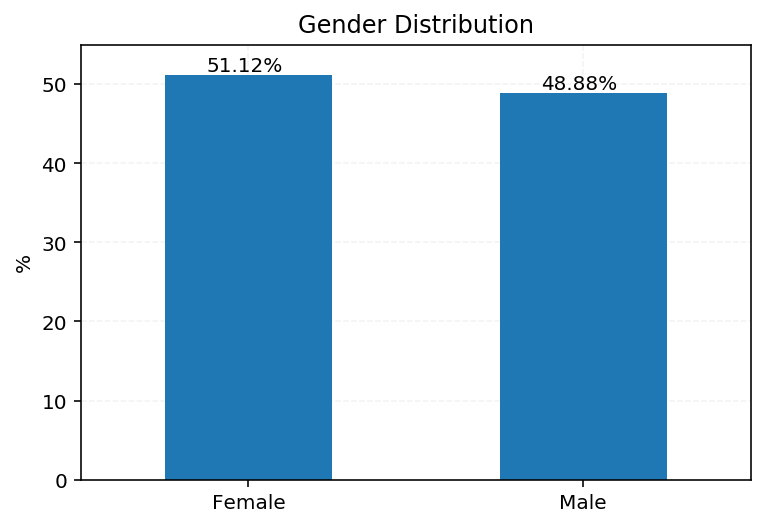

In [19]:
temp = users[~users.gender.isna()].gender.apply(lambda x: str(x).title()).value_counts(normalize=True).to_frame().applymap(lambda x: round(x * 100, 2))

ax = temp.plot.bar(legend=False, title='Gender Distribution', ylim=(0, 55), xlim=(0, 100))
ax.set_ylabel("%")
ax.tick_params(axis='x', labelrotation=0)
ax.grid(color='lightgrey', linestyle='--', linewidth=.75, alpha=.3)
ax.set_axisbelow(True)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 4., p.get_height() + .5))

Age distribution

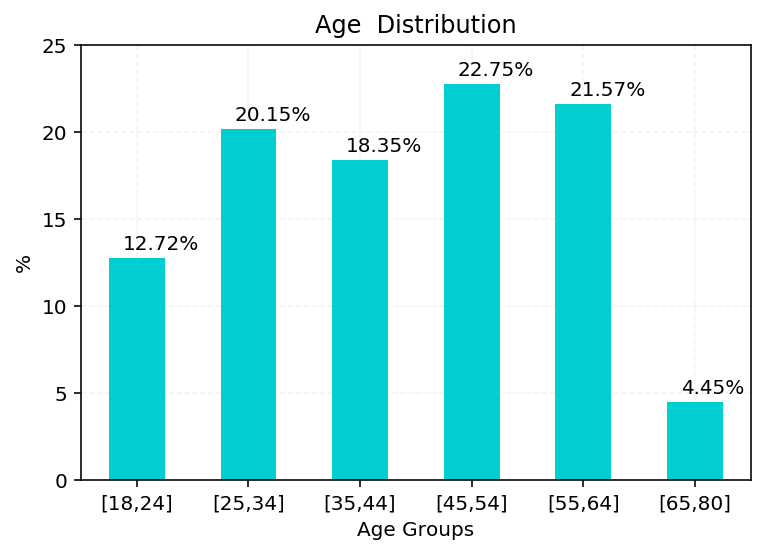

In [20]:
temp = users[~users.age_recode.isna()].age_recode.apply(str).value_counts(normalize=True).to_frame().applymap(lambda x: x * 100).rename(index={'(24,34]': '[25,34]', '(34,44]': '[35,44]', '(44,54]': '[45,54]', '(54,64]': '[55,64]', '(64,80]': '[65,80]', 'nan': 'n/a'}).sort_index()
ax = temp.plot.bar(legend=False, title='Age  Distribution', color='darkturquoise', ylim=(0, 25))
ax.set_ylabel("%")
ax.set_xlabel("Age Groups")
ax.grid(color='lightgrey', linestyle='--', linewidth=.75, alpha=.3)
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelrotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 4., p.get_height() + .5))

### With filtering

In [21]:
users_filtered = users[users.panelist_id.isin(selected_users['user'].values)].copy()

Number of users

In [22]:
len(users_filtered)

1455

Gender distribution

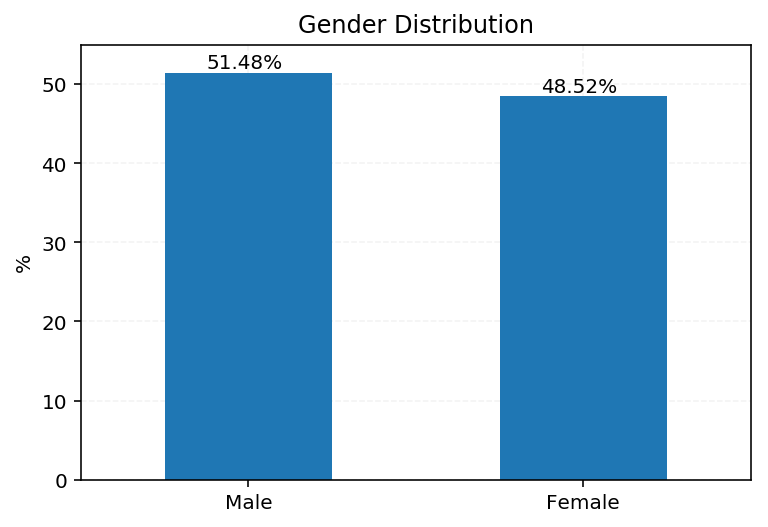

In [23]:
temp = users_filtered[~users_filtered.gender.isna()].gender.apply(lambda x: str(x).title()).value_counts(normalize=True).to_frame().applymap(lambda x: round(x * 100, 2))
ax = temp.plot.bar(legend=False, title='Gender Distribution', ylim=(0, 55), xlim=(0, 100))
ax.set_ylabel("%")
ax.tick_params(axis='x', labelrotation=0)
ax.grid(color='lightgrey', linestyle='--', linewidth=.75, alpha=.3)
ax.set_axisbelow(True)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 4., p.get_height() + .5))

Age distribution

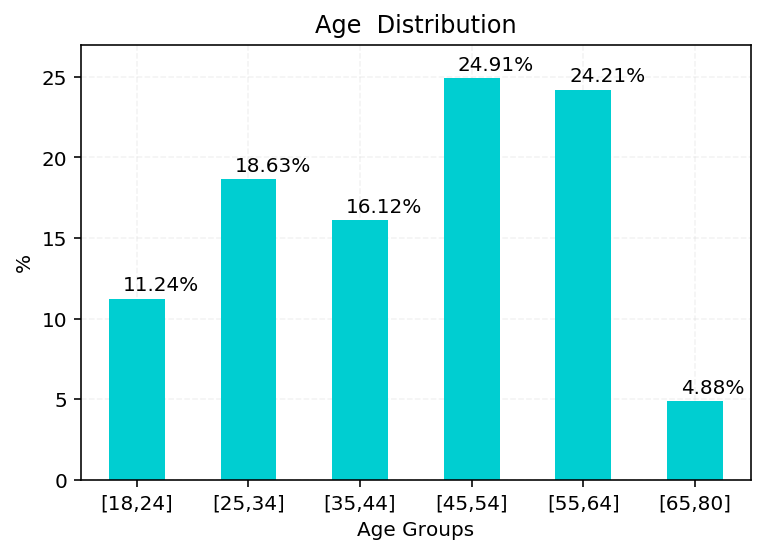

In [24]:
temp = users_filtered[~users_filtered.age_recode.isna()].age_recode.apply(str).value_counts(normalize=True).to_frame().applymap(lambda x: x * 100).rename(index={'(24,34]': '[25,34]', '(34,44]': '[35,44]', '(44,54]': '[45,54]', '(54,64]': '[55,64]', '(64,80]': '[65,80]', 'nan': 'n/a'}).sort_index()
ax = temp.plot.bar(legend=False, title='Age  Distribution', color='darkturquoise', ylim=(0, 27))
ax.set_ylabel("%")
ax.set_xlabel("Age Groups")
ax.grid(color='lightgrey', linestyle='--', linewidth=.75, alpha=.3)
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelrotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 4., p.get_height() + .5))